# Microsoft Professional Program for Data Science 

#### This notebook shall help preparing the data for the regression training by estimating all missing columns of incomplete data entries.

In [1]:
# Import standard library set and shared definitions of file names and paths
%run -i MPPSharedDefines.py
%matplotlib inline

import seaborn as sns
import scipy.stats as ss
import sklearn.decomposition as skde
from sklearn import feature_selection as fs

In [2]:
training_data_pd = pd.read_csv(TEMP_PATH+CLEANED_TRAINING_OUTPUT_FN)
training_data_pd = training_data_pd.drop('row_id', axis=1)
training_data_pd.head(10)

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,rate_spread,sex_name,ethnicity_name,race_name,loan_type_name,property_type_name,purpose_name,tract_income,sex_male,sex_female,sex_other,purp_purchase,purp_improvement,purp_refinancing,type_1_to_4,type_manuf,type_multi_fam,oc_owner_occ,oc_not_owner_occ,oc_not_app,preapp_owner_occ,preapp_not_oo,preapp_not_app,type_convl,type_fha,type_va,type_fsarhs,race_white,race_black,race_asian,race_hawaiian,race_native,race_not_prov,eth_hispanic,eth_non_his,eth_not_prov,sex_not_prov,income_not_prov,msa_spread,lender_spread,lender_spread_lt,lender_spread_lp,lender_spread_pt,county_spread,loantype_aspread,proptype_aspread,loanpurp_aspread,occupancy_aspread,state_spread,income_loan_rel
0,2,1,1,1,139.0,1,261,14,246,2,5,1,77.0,5949.0,11.642,63.192,100.000,1556.0,1993.0,2094,True,1.0,Male (1),Non-Hispanic(2),White(5),FHA-insured(2),1-4-family-non-mf(1),Home purchase(1),63.192000,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,0,0.502335,-0.680641,-0.742752,-0.708915,-0.689624,0.217119,-0.620380,-0.364393,-0.061103,-0.00892,0.250070,0.553957
1,2,2,1,1,160.0,3,349,48,311,1,5,1,42.0,2667.0,37.141,63.693,75.729,875.0,1163.0,4194,False,2.0,Male (1),Hispanic/Latino(1),White(5),FHA-insured(2),Manufactured housing(2),Home purchase(1),48.234072,True,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False,0,0.144051,-0.503537,-0.494021,-0.428029,-0.502672,0.564956,-0.620380,2.011958,-0.061103,-0.00892,0.133498,0.262500
2,1,2,1,1,168.0,3,385,30,256,3,2,1,34.0,6393.0,79.635,42.883,76.948,636.0,1611.0,1119,False,3.0,Male (1),Unknown(3),Asian(2),Conventional(1),Manufactured housing(2),Home purchase(1),32.997611,True,False,False,True,False,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,True,False,0,-0.534250,3.721786,3.721786,3.717423,3.721861,-0.534250,0.752205,2.011958,-0.061103,-0.00892,-0.127125,0.202381
3,1,2,1,1,57.0,3,117,30,46,1,6,1,37.0,7175.0,72.843,63.806,78.836,1587.0,2172.0,1119,False,6.0,Male (1),Hispanic/Latino(1),Unknown,Conventional(1),Manufactured housing(2),Home purchase(1),50.302098,True,False,False,True,False,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,False,False,False,0,-0.040448,3.721786,3.721786,3.717423,3.721861,-0.040448,0.752205,2.011958,-0.061103,-0.00892,-0.127125,0.649123
4,2,1,2,1,25.0,3,95,41,192,2,5,2,46.0,5041.0,23.188,70.908,59.579,756.0,1992.0,1593,False,4.0,Female (2),Non-Hispanic(2),White(5),FHA-insured(2),1-4-family-non-mf(1),Home improvement(2),42.246277,False,True,False,False,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,False,0,-0.270596,1.425630,1.275630,1.641015,1.425630,-0.406509,-0.620380,-0.364393,1.280664,-0.00892,-0.260579,1.840000
5,2,1,1,1,88.0,2,261,50,92,2,5,2,53.0,3278.0,4.913,55.945,100.000,1141.0,2647.0,2800,True,1.0,Female (2),Non-Hispanic(2),White(5),FHA-insured(2),1-4-family-non-mf(1),Home purchase(1),55.945000,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,0,0.502335,-0.828537,-0.756628,-0.827926,-0.845615,-0.324370,-0.620380,-0.364393,-0.061103,-0.00892,0.064811,0.602273
6,2,1,1,1,345.0,3,80,9,232,1,5,1,90.0,3827.0,16.331,114.291,67.921,1113.0,1352.0,3797,True,1.0,Male (1),Hispanic/Latino(1),W

In [3]:
validation_data_pd = pd.read_csv(TEMP_PATH+CLEANED_TEST_OUTPUT_FN)
validation_data_pd = validation_data_pd.drop('row_id', axis=1)
validation_data_pd.head(10)

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,tract_income,sex_male,sex_female,sex_other,purp_purchase,purp_improvement,purp_refinancing,type_1_to_4,type_manuf,type_multi_fam,oc_owner_occ,oc_not_owner_occ,oc_not_app,preapp_owner_occ,preapp_not_oo,preapp_not_app,type_convl,type_fha,type_va,type_fsarhs,race_white,race_black,race_asian,race_hawaiian,race_native,race_not_prov,eth_hispanic,eth_non_his,eth_not_prov,sex_not_prov,income_not_prov,msa_spread,lender_spread,lender_spread_lt,lender_spread_lp,lender_spread_pt,county_spread,loantype_aspread,proptype_aspread,loanpurp_aspread,occupancy_aspread,state_spread,income_loan_rel
0,1,2,1,1,46.0,3,262,37,83,1,5,2,50.0,10761.0,43.415,61.732,100.000,2900.0,3603.0,1119,False,61.732000,False,True,False,True,False,False,False,True,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,False,False,0,-0.286606,3.721786,3.721786,3.717423,3.721861,-0.331805,0.752205,2.011958,-0.061103,-0.008920,-0.267297,1.086957
1,1,1,3,1,170.0,3,282,11,267,2,5,1,155.0,2285.0,20.115,50.373,100.000,539.0,873.0,4216,False,50.373000,True,False,False,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,0,-0.194370,0.597059,0.597059,1.025630,0.597059,-0.194370,0.752205,-0.364393,-0.129259,-0.008920,-0.177022,0.911765
2,1,1,1,1,174.0,3,274,12,162,1,5,1,102.0,7765.0,78.621,75.175,54.165,1559.0,1712.0,2467,False,40.718539,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,False,False,0,-0.452631,-0.082744,-0.082744,-0.083823,-0.078330,-0.546312,0.752205,-0.364393,-0.061103,-0.008920,-0.312053,0.586207
3,1,1,1,2,116.0,2,254,37,282,2,5,1,51.0,3387.0,96.208,48.677,74.476,938.0,784.0,2773,True,36.252683,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,0,-0.305859,0.287925,0.287925,0.301492,0.287925,-0.300709,0.752205,-0.364393,-0.061103,0.133216,-0.267297,0.439655
4,1,1,3,1,108.0,3,194,41,17,2,5,1,88.0,3106.0,6.370,68.070,100.000,1119.0,1301.0,3110,False,68.070000,True,False,False,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,0,-0.446455,0.117067,0.293796,0.220138,0.132297,-0.502899,0.752205,-0.364393,-0.129259,-0.008920,-0.260579,0.814815
5,1,1,1,1,53.0,3,215,11,39,2,3,1,26.0,6338.0,89.621,68.957,88.605,1303.0,1837.0,356,False,61.099350,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,False,0,-0.559211,-0.716557,-0.846321,-0.708847,-0.716125,-0.704889,0.752205,-0.364393,-0.061103,-0.008920,-0.177022,0.490566
6,1,1,3,1,175.0,3,294,31,101,2,5,1,55.0,4488.0,4.468,84.698,100.000,1290.0,1444.0,1657,False,84.698000,True,False,False,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,0,0.014724,-0.793418,-0.282062,-0.739076,-0.793418,0.438217,0.752205,-0.364393,-0.129259,-0.008920,-0.018430,0.314286
7,2,1,1,1,135.0,2,339,14,230,1,5,1,40.0,6896.0,22.123,65.203,81.272,1933.0,2772.0,809,False,52.991782,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,0,-0.224370,-0.927422,-0.925826,-0.927002,-0.927422,-0.224370,-0.620380,-0.364393,-0.061103,-0.008920,0.250070,0.2

In [4]:
validation_data_pd.count()

loan_type            200000
property_type        200000
loan_purpose         200000
occupancy            200000
loan_amount          200000
                      ...  
proptype_aspread     200000
loanpurp_aspread     200000
occupancy_aspread    200000
state_spread         200000
income_loan_rel      200000
Length: 64, dtype: int64

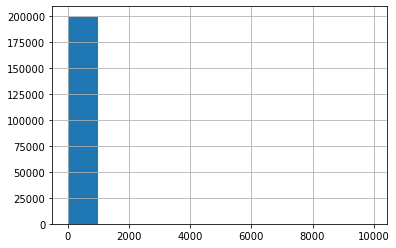

In [5]:
validation_data_pd['applicant_income'].hist()

In [6]:
# Receive training data target labels
training_rate_spread = np.array(training_data_pd['rate_spread'])

# Remove all other labels

In [7]:
def convert_categorical_columns(data_set):
    """
    Removes all columns which are not part of the test data
    """
    reduced_data_set = pd.concat([data_set[['loan_amount', 'applicant_income', 'population', 'minority_population_pct', 
                                            'ffiecmedian_family_income', 'tract_to_msa_md_income_pct', 
                                            'number_of_owner-occupied_units','number_of_1_to_4_family_units', 
                                            'co_applicant']], \
                                  data_set.loc[:,'tract_income':'income_not_prov'],
                                   data_set.loc[:,'purp_purchase':'type_fsarhs'],
                                   data_set.loc[:,'msa_spread':'income_loan_rel']
                                 ], axis=1)
    return reduced_data_set

prepared_training_set = convert_categorical_columns(training_data_pd)
prepared_training_set.head(5)

,loan_amount,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,co_applicant,tract_income,sex_male,sex_female,sex_other,purp_purchase,purp_improvement,purp_refinancing,type_1_to_4,type_manuf,type_multi_fam,oc_owner_occ,oc_not_owner_occ,oc_not_app,preapp_owner_occ,preapp_not_oo,preapp_not_app,type_convl,type_fha,type_va,type_fsarhs,race_white,race_black,race_asian,race_hawaiian,race_native,race_not_prov,eth_hispanic,eth_non_his,eth_not_prov,sex_not_prov,income_not_prov,purp_purchase,purp_improvement,purp_refinancing,type_1_to_4,type_manuf,type_multi_fam,oc_owner_occ,oc_not_owner_occ,oc_not_app,preapp_owner_occ,preapp_not_oo,preapp_not_app,type_convl,type_fha,type_va,type_fsarhs,msa_spread,lender_spread,lender_spread_lt,lender_spread_lp,lender_spread_pt,county_spread,loantype_aspread,proptype_aspread,loanpurp_aspread,occupancy_aspread,state_spread,income_loan_rel
0,139.0,77.0,5949.0,11.642,63.192,100.000,1556.0,1993.0,True,63.192000,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,0,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,0.502335,-0.680641,-0.742752,-0.708915,-0.689624,0.217119,-0.620380,-0.364393,-0.061103,-0.00892,0.250070,0.553957
1,160.0,42.0,2667.0,37.141,63.693,75.729,875.0,1163.0,False,48.234072,True,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False,0,True,False,False,False,True,False,True,False,False,False,False,True,False,True,False,False,0.144051,-0.503537,-0.494021,-0.428029,-0.502672,0.564956,-0.620380,2.011958,-0.061103,-0.00892,0.133498,0.262500
2,168.0,34.0,6393.0,79.635,42.883,76.948,636.0,1611.0,False,32.997611,True,False,False,True,False,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,True,False,0,True,False,False,False,True,False,True,False,False,False,False,True,True,False,False,False,-0.534250,3.721786,3.721786,3.717423,3.721861,-0.534250,0.752205,2.011958,-0.061103,-0.00892,-0.127125,0.202381
3,57.0,37.0,7175.0,72.843,63.806,78.836,1587.0,2172.0,False,50.302098,True,False,False,True,False,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,False,False,False,0,True,False,False,False,True,False,True,False,False,False,False,True,True,False,False,False,-0.040448,3.721786,3.721786,3.717423,3.721861,-0.040448,0.752205,2.011958,-0.061103,-0.00892,-0.127125,0.649123
4,25.0,46.0,5041.0,23.188,70.908,59.579,756.0,1992.0,False,42.246277,False,True,False,False,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,False,0,False,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,-0.270596,1.425630,1.275630,1.641015,1.425630,-0.406509,-0.620380,-0.364393,1.280664,-0.00892,-0.260579,1.840000


In [8]:
prepared_training_set.count()

loan_amount                  200000
applicant_income             200000
population                   200000
minority_population_pct      200000
ffiecmedian_family_income    200000
                              ...  
proptype_aspread             200000
loanpurp_aspread             200000
occupancy_aspread            200000
state_spread                 200000
income_loan_rel              200000
Length: 68, dtype: int64

In [9]:
validation_set = convert_categorical_columns(validation_data_pd)
validation_set.head(5)

,loan_amount,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,co_applicant,tract_income,sex_male,sex_female,sex_other,purp_purchase,purp_improvement,purp_refinancing,type_1_to_4,type_manuf,type_multi_fam,oc_owner_occ,oc_not_owner_occ,oc_not_app,preapp_owner_occ,preapp_not_oo,preapp_not_app,type_convl,type_fha,type_va,type_fsarhs,race_white,race_black,race_asian,race_hawaiian,race_native,race_not_prov,eth_hispanic,eth_non_his,eth_not_prov,sex_not_prov,income_not_prov,purp_purchase,purp_improvement,purp_refinancing,type_1_to_4,type_manuf,type_multi_fam,oc_owner_occ,oc_not_owner_occ,oc_not_app,preapp_owner_occ,preapp_not_oo,preapp_not_app,type_convl,type_fha,type_va,type_fsarhs,msa_spread,lender_spread,lender_spread_lt,lender_spread_lp,lender_spread_pt,county_spread,loantype_aspread,proptype_aspread,loanpurp_aspread,occupancy_aspread,state_spread,income_loan_rel
0,46.0,50.0,10761.0,43.415,61.732,100.000,2900.0,3603.0,False,61.732000,False,True,False,True,False,False,False,True,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,False,False,0,True,False,False,False,True,False,True,False,False,False,False,True,True,False,False,False,-0.286606,3.721786,3.721786,3.717423,3.721861,-0.331805,0.752205,2.011958,-0.061103,-0.008920,-0.267297,1.086957
1,170.0,155.0,2285.0,20.115,50.373,100.000,539.0,873.0,False,50.373000,True,False,False,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,0,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,False,-0.194370,0.597059,0.597059,1.025630,0.597059,-0.194370,0.752205,-0.364393,-0.129259,-0.008920,-0.177022,0.911765
2,174.0,102.0,7765.0,78.621,75.175,54.165,1559.0,1712.0,False,40.718539,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,False,False,0,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False,False,-0.452631,-0.082744,-0.082744,-0.083823,-0.078330,-0.546312,0.752205,-0.364393,-0.061103,-0.008920,-0.312053,0.586207
3,116.0,51.0,3387.0,96.208,48.677,74.476,938.0,784.0,True,36.252683,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,0,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,-0.305859,0.287925,0.287925,0.301492,0.287925,-0.300709,0.752205,-0.364393,-0.061103,0.133216,-0.267297,0.439655
4,108.0,88.0,3106.0,6.370,68.070,100.000,1119.0,1301.0,False,68.070000,True,False,False,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,0,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,False,-0.446455,0.117067,0.293796,0.220138,0.132297,-0.502899,0.752205,-0.364393,-0.129259,-0.008920,-0.260579,0.814815


In [10]:
print(prepared_training_set.shape)
print(validation_set.shape)

(200000, 68)
(200000, 68)


In [11]:
features = np.array(prepared_training_set)
test_features = np.array(validation_set)
labels = np.array(training_rate_spread).reshape(-1,1)

# Principal Component Analysis
# pca_model = skde.PCA()
# pca_fit = pca_model.fit(features)
# features = pca_fit.transform(features)
# Note: No improvement via PCA

# Feature Reduction
# sel = fs.VarianceThreshold(threshold=(.8 * (1 - .8)))
# features = sel.fit_transform(features)
# Note: No improvement via feature selection

scaler = preprocessing.StandardScaler().fit(features)
features = scaler.transform(features)
test_features = scaler.transform(test_features)

label_scaler = preprocessing.StandardScaler().fit(labels)
labels = label_scaler.transform(labels)

In [12]:
def hist_resids(y_test, y_score, model):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    fig = plt.figure(figsize=(16,6))
    sns.distplot(resids)
    plt.title('Histogram of residuals ({})'.format(model))
    plt.xlabel('Residual value')
    plt.ylabel('count')
    plt.show()
    
def resid_qq(y_test, y_score, model):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    fig = plt.figure(figsize=(16,6))
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values ({})'.format(model))
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()
    
def resid_plot(y_test, y_score, model):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    fig = plt.figure(figsize=(16,6))
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values ({})'.format(model))
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')    
    
def show_pred_vs_test(y_test, y_score, model):
    samples = 60
    fig = plt.figure(figsize=(16,6))
    x = range(samples)
    y1 = y_test[:samples].reshape(-1)
    y2 = y_score[:samples].reshape(-1)
    dy = (y2-y1)/2
    ye = (y1+y2)/2
    plt.scatter(x, y1, c='red')
    plt.scatter(x, y2, c='blue')
    plt.errorbar(x, ye, yerr=dy, fmt='.');
    plt.ylabel("Rate spread")
    plt.xlabel("Test sample")
    plt.title("Predicted vs. test value ({})".format(model))
    plt.show()    
    
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))    

In [13]:
X_train, X_valid, y_train, y_valid = ms.train_test_split(features, labels, test_size=0.1, random_state=42)
X_train, X_test, y_train, y_test = ms.train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print("{} {} {} {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

## define and fit the linear regression model
lin_mod = linear_model.LinearRegression()
lin_mod.fit(X_train, y_train.ravel())

y_score = lin_mod.predict(X_test)

print_metrics(y_test, y_score, X_train.shape[1])

rescaled_test = label_scaler.inverse_transform(y_test)
rescaled_score = label_scaler.inverse_transform(y_score)
print("\nRescaled:")
print_metrics(rescaled_test, rescaled_score, X_train.shape[1])

(162000, 68) (18000, 68) (162000, 1) (18000, 1)
Mean Square Error      = 0.2259084951074069
Root Mean Square Error = 0.4752983222223774
Mean Absolute Error    = 0.30846989272549996
Median Absolute Error  = 0.18265324726338047
R^2                    = 0.7702960596592376
Adjusted R^2           = 0.769437808264924

Rescaled:
Mean Square Error      = 0.5735981836890147
Root Mean Square Error = 0.7573626500488486
Mean Absolute Error    = 0.4915304020483444
Median Absolute Error  = 0.29104825521075395
R^2                    = 0.7702960596592376
Adjusted R^2           = 0.769437808264924


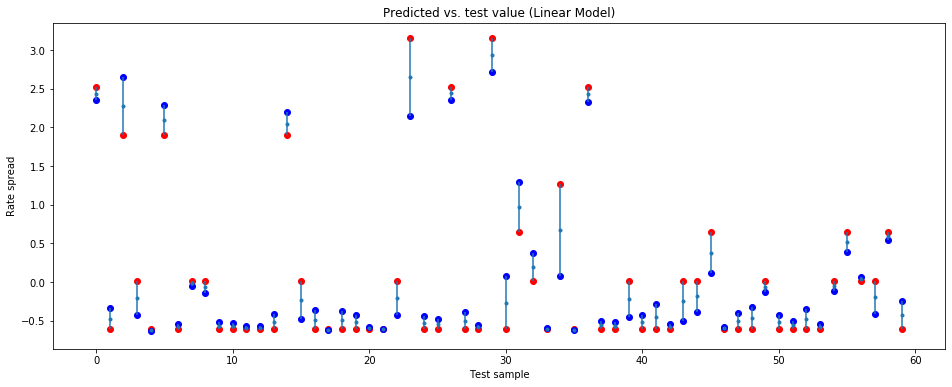

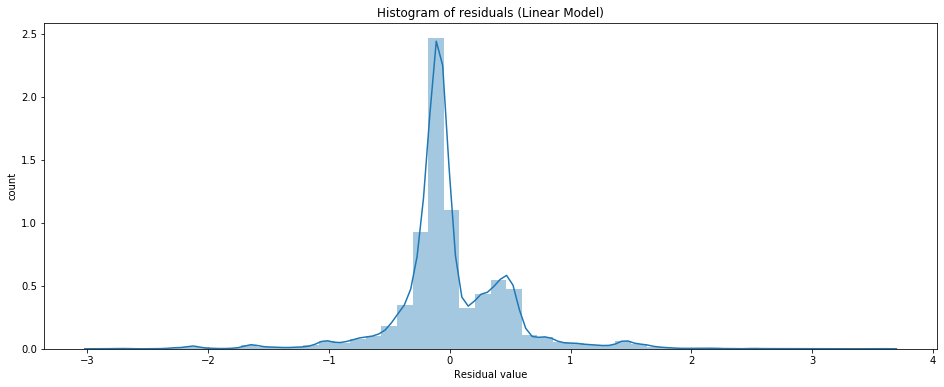

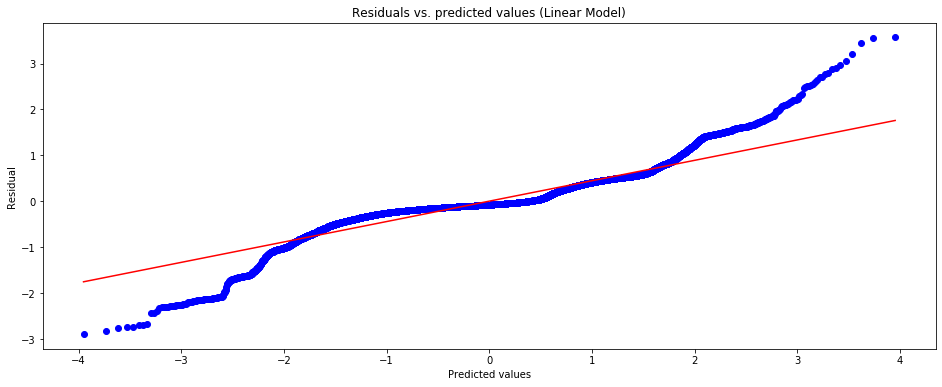

In [14]:
show_pred_vs_test(y_test, y_score, 'Linear Model')
hist_resids(y_test, y_score, 'Linear Model')
resid_qq(y_test, y_score, 'Linear Model')

In [57]:
from sklearn.neural_network import MLPRegressor
nn_mod = MLPRegressor(hidden_layer_sizes=(32, 8), max_iter=500)
nn_mod.fit(X_train, y_train.ravel())

y_score = nn_mod.predict(X_test)

print_metrics(y_test, y_score, X_train.shape[1])

rescaled_test = label_scaler.inverse_transform(y_test)
rescaled_score = label_scaler.inverse_transform(y_score)
print("\nRescaled:")
print_metrics(rescaled_test, rescaled_score, X_train.shape[1])

Mean Square Error      = 0.19481600592058723
Root Mean Square Error = 0.44137966187918903
Mean Absolute Error    = 0.29079334604780044
Median Absolute Error  = 0.17016910114178907
R^2                    = 0.8019109277845792
Adjusted R^2           = 0.8011708002004595

Rescaled:
Mean Square Error      = 0.4946520806863333
Root Mean Square Error = 0.703315065021597
Mean Absolute Error    = 0.46336376309843663
Median Absolute Error  = 0.27115543096084627
R^2                    = 0.8019109277845792
Adjusted R^2           = 0.8011708002004595


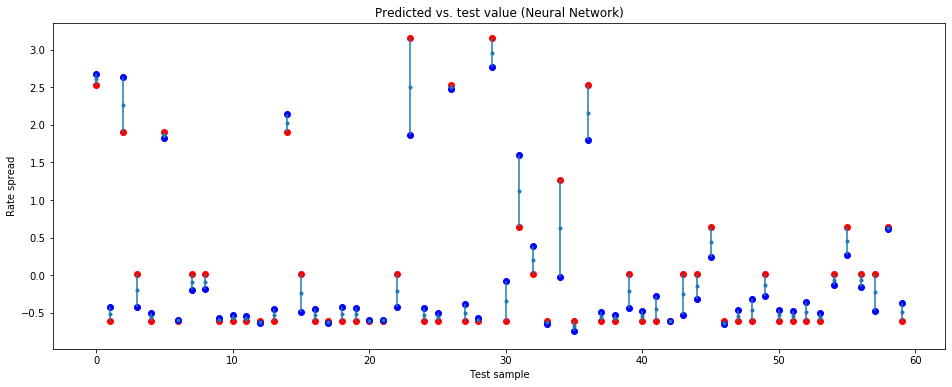

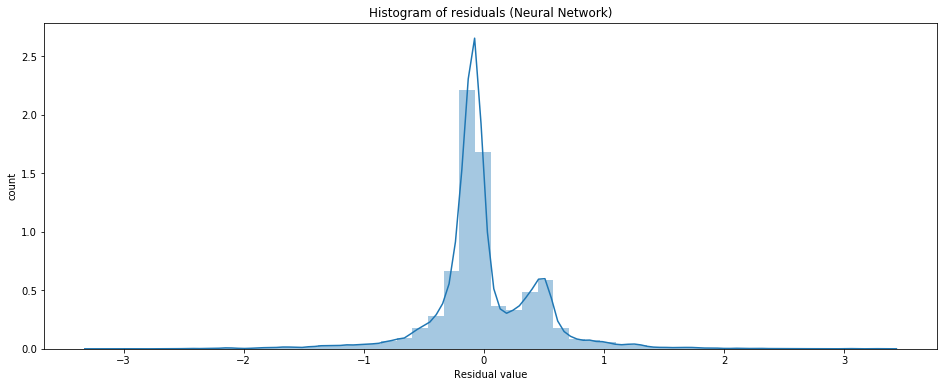

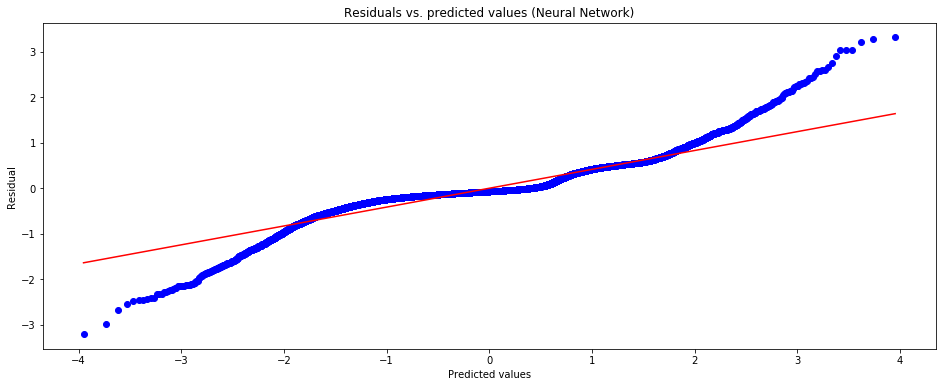

In [58]:
show_pred_vs_test(y_test, y_score, 'Neural Network')
hist_resids(y_test, y_score, 'Neural Network')
resid_qq(y_test, y_score, 'Neural Network')

In [59]:
y_score = nn_mod.predict(X_valid)

print_metrics(y_valid, y_score, X_train.shape[1])

rescaled_test = label_scaler.inverse_transform(y_valid)
rescaled_score = label_scaler.inverse_transform(y_score)
print("\nRescaled:")
print_metrics(rescaled_test, rescaled_score, X_train.shape[1])

Mean Square Error      = 0.19268935618618266
Root Mean Square Error = 0.4389639577302249
Mean Absolute Error    = 0.2924277944204816
Median Absolute Error  = 0.17323418840798205
R^2                    = 0.8078295909201768
Adjusted R^2           = 0.8071836237614196

Rescaled:
Mean Square Error      = 0.489252361545992
Root Mean Square Error = 0.699465768673487
Mean Absolute Error    = 0.4659681698321146
Median Absolute Error  = 0.2760394848403145
R^2                    = 0.8078295909201768
Adjusted R^2           = 0.8071836237614196


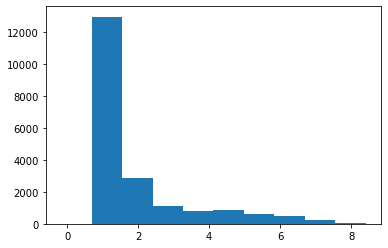

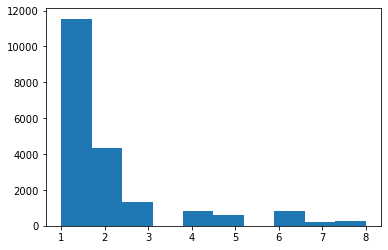

1.0
8.0
1.9705
1.5955969885907908


In [60]:
plt.hist(rescaled_score)
plt.show()
plt.hist(rescaled_test)
plt.show()
print(rescaled_test.min())
print(rescaled_test.max())
print(rescaled_test.mean())
print(rescaled_test.std())


-3.251227598249089
9.052494176289272
1.9704527456547174
1.4339935896569935


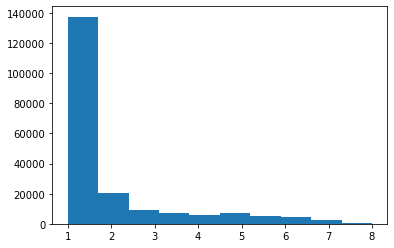

In [61]:
y_test_score = nn_mod.predict(test_features)
# print(y_test_score.shape)
rescaled_score = label_scaler.inverse_transform(y_test_score)
submission = pd.DataFrame(columns=['row_id', 'rate_spread'])
submission['row_id'] = range(0, 200000)
submission['rate_spread'] = rescaled_score
submission.loc[submission['rate_spread']<1.0, 'rate_spread'] = 1.0
submission.loc[submission['rate_spread']>8.0, 'rate_spread'] = 8.0
print(rescaled_score.min())
print(rescaled_score.max())
print(rescaled_score.mean())
print(rescaled_score.std())
plt.hist(submission['rate_spread'])
plt.show()

In [62]:
print(submission.count())

below_1 = submission.loc[submission['rate_spread']<0.0]
print(below_1.count())

row_id         200000
rate_spread    200000
dtype: int64
row_id         0
rate_spread    0
dtype: int64


In [63]:
critical_rows = validation_data_pd.iloc[below_1.index]
critical_rows.head(20)

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,tract_income,sex_male,sex_female,sex_other,purp_purchase,purp_improvement,purp_refinancing,type_1_to_4,type_manuf,type_multi_fam,oc_owner_occ,oc_not_owner_occ,oc_not_app,preapp_owner_occ,preapp_not_oo,preapp_not_app,type_convl,type_fha,type_va,type_fsarhs,race_white,race_black,race_asian,race_hawaiian,race_native,race_not_prov,eth_hispanic,eth_non_his,eth_not_prov,sex_not_prov,income_not_prov,msa_spread,lender_spread,lender_spread_lt,lender_spread_lp,lender_spread_pt,county_spread,loantype_aspread,proptype_aspread,loanpurp_aspread,occupancy_aspread,state_spread,income_loan_rel


In [64]:
submission.to_csv(TEMP_PATH+"/submission.csv", index=False)

In [23]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

# #############################################################################
# Load data
boston = datasets.load_boston()
# X, y = shuffle(boston.data, boston.target, random_state=13)
# X = X.astype(np.float32)
# offset = int(X.shape[0] * 0.9)
# X_train, y_train = X[:offset], y[:offset]
# X_test, y_test = X[offset:], y[offset:]

# #############################################################################
# Fit regression model
params = {'n_estimators': 1000, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.03, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train.ravel())
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

y_score = clf.predict(X_test)

print_metrics(y_test, y_score, X_train.shape[1])

rescaled_test = label_scaler.inverse_transform(y_test)
rescaled_score = label_scaler.inverse_transform(y_score)
print("\nRescaled:")
print_metrics(rescaled_test, rescaled_score, X_train.shape[1])


MSE: 0.1812
Mean Square Error      = 0.18118680888017316
Root Mean Square Error = 0.42566043847199747
Mean Absolute Error    = 0.28087991906049703
Median Absolute Error  = 0.1649035162281258
R^2                    = 0.8157691063465464
Adjusted R^2           = 0.8150807575915396

Rescaled:
Mean Square Error      = 0.4600465530641679
Root Mean Square Error = 0.6782673168185004
Mean Absolute Error    = 0.44756724334834774
Median Absolute Error  = 0.26276500087133425
R^2                    = 0.8157691063465464
Adjusted R^2           = 0.8150807575915396


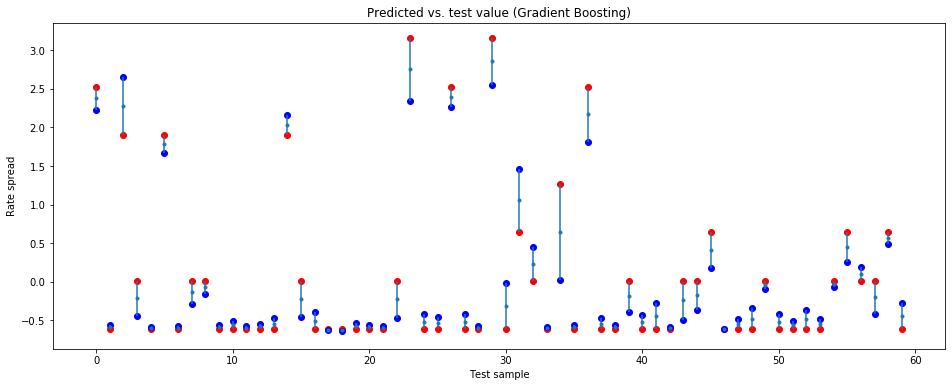

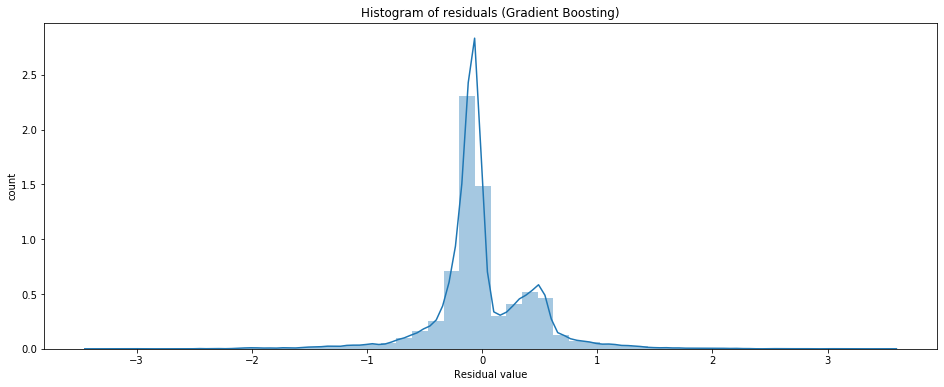

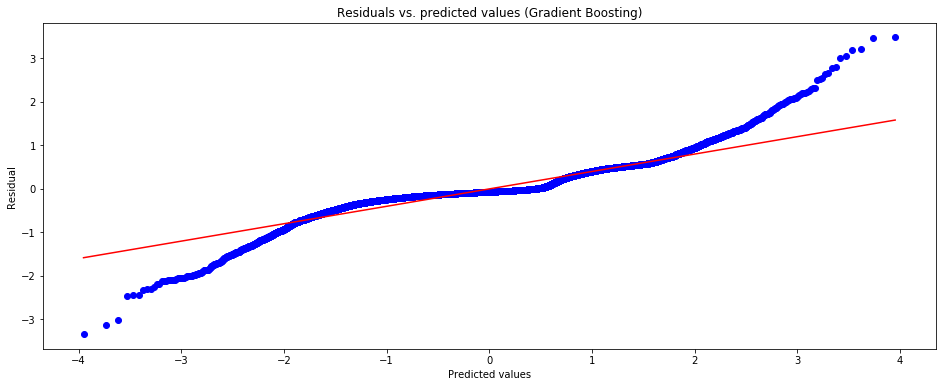

In [24]:
show_pred_vs_test(y_test, y_score, 'Gradient Boosting')
hist_resids(y_test, y_score, 'Gradient Boosting')
resid_qq(y_test, y_score, 'Gradient Boosting')

0.008284998427473544
8.523249505129412
1.9687981574328837
1.4253419806735121


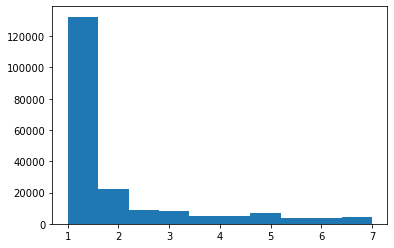

In [37]:
y_test_score = clf.predict(test_features)
rescaled_score = label_scaler.inverse_transform(y_test_score)
submission = pd.DataFrame(columns=['row_id', 'rate_spread'])
submission['row_id'] = range(0, 200000)
submission['rate_spread'] = rescaled_score
submission.loc[submission['rate_spread']<1.0, 'rate_spread'] = 1.0
submission.loc[submission['rate_spread']>7.0, 'rate_spread'] = 7.0
print(rescaled_score.min())
print(rescaled_score.max())
print(rescaled_score.mean())
print(rescaled_score.std())
plt.hist(submission['rate_spread'])
plt.show()

In [38]:
submission.to_csv(TEMP_PATH+"/submission_boosting.csv", index=False)

In [27]:
# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

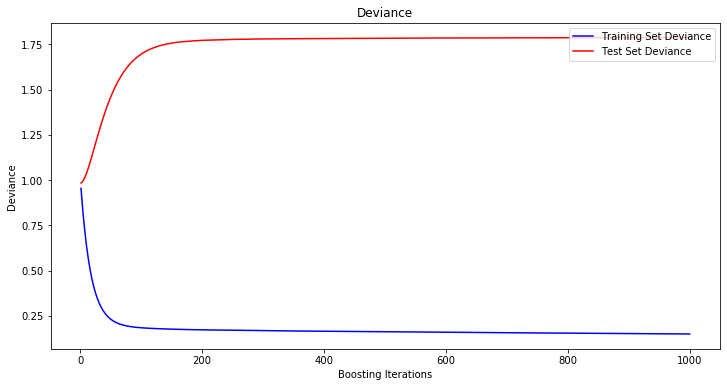

MPPSharedDefines.py:18: RuntimeWarning: divide by zero encountered in log
  TRAIN_LABELS_FN = "train_labels.csv"  # Label data CSV


[27 55 54 45 28 48 18 21 22 32 49 24 50 51 42 15 38 23 33 12 10 52 31 25
 41 11 14 29 36 34 53 19 62 46 35 26 64 40 65 44 37  8 13 17 43 20 47 30
 16 63  5  6  7 56 39  2  9  4  3  1 61 66 57 67  0 58 60 59]


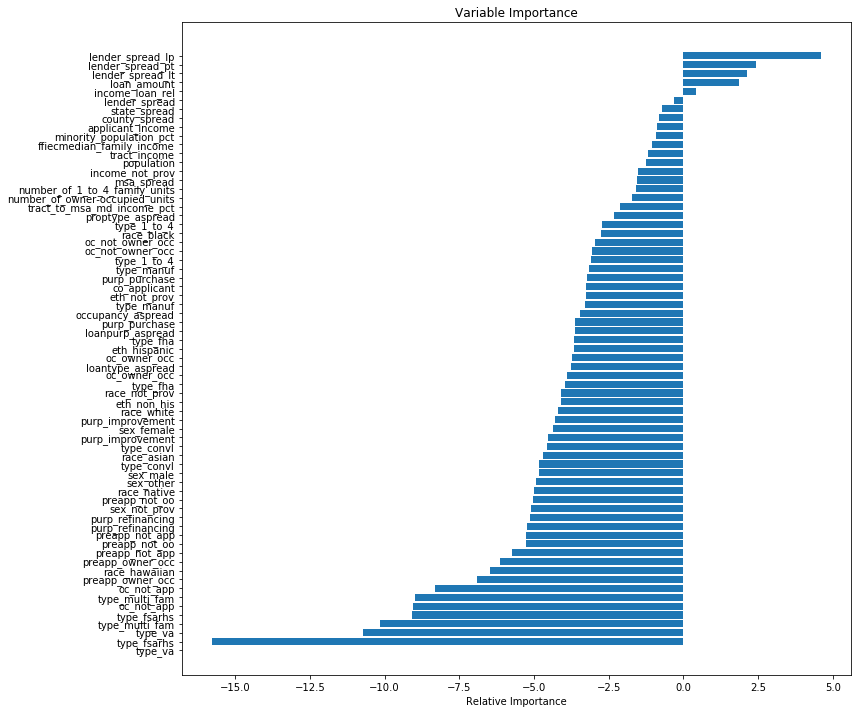

In [28]:
plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.show()

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
plt.figure(figsize=(12, 12))
# make importances relative to max importance
feature_importance = np.log(100.0 * (feature_importance / feature_importance.max()))
sorted_idx = np.argsort(feature_importance)
print(sorted_idx)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, validation_set.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [29]:
y_score = clf.predict(X_test)

print_metrics(y_test, y_score, X_train.shape[1])

rescaled_test = label_scaler.inverse_transform(y_test)
rescaled_score = label_scaler.inverse_transform(y_score)
print("\nRescaled:")
print_metrics(rescaled_test, rescaled_score, X_train.shape[1])

Mean Square Error      = 0.18118680888017316
Root Mean Square Error = 0.42566043847199747
Mean Absolute Error    = 0.28087991906049703
Median Absolute Error  = 0.1649035162281258
R^2                    = 0.8157691063465464
Adjusted R^2           = 0.8150807575915396

Rescaled:
Mean Square Error      = 0.4600465530641679
Root Mean Square Error = 0.6782673168185004
Mean Absolute Error    = 0.44756724334834774
Median Absolute Error  = 0.26276500087133425
R^2                    = 0.8157691063465464
Adjusted R^2           = 0.8150807575915396


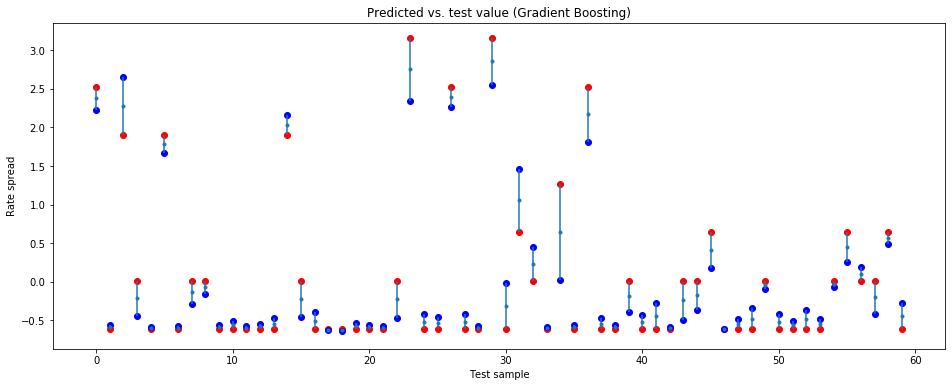

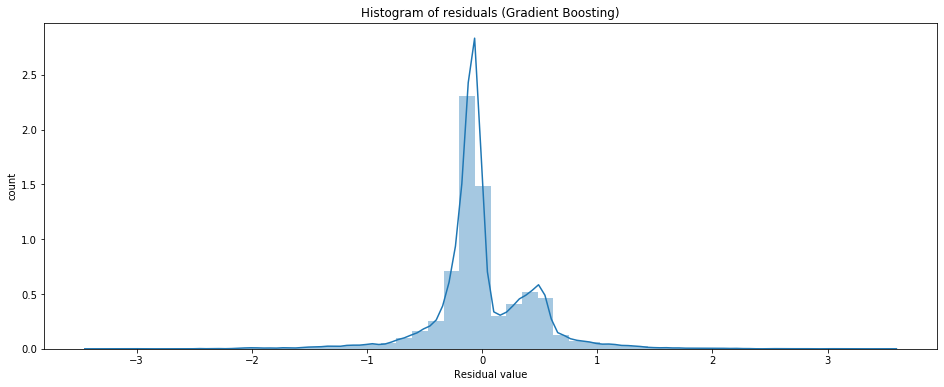

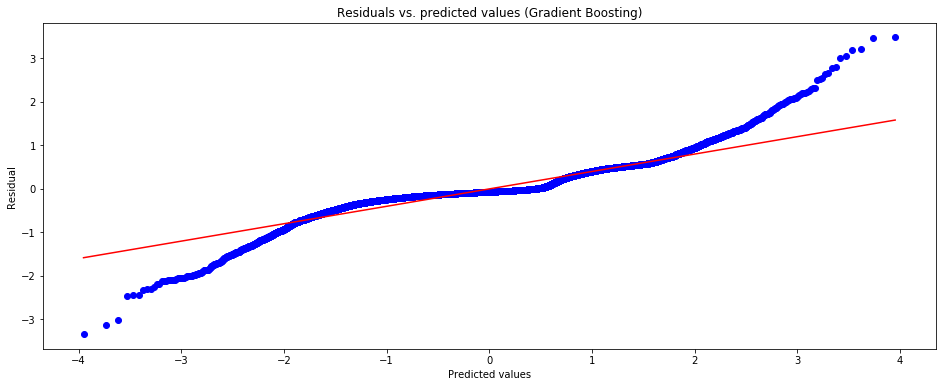

In [30]:
show_pred_vs_test(y_test, y_score, 'Gradient Boosting')
hist_resids(y_test, y_score, 'Gradient Boosting')
resid_qq(y_test, y_score, 'Gradient Boosting')

In [36]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

# #############################################################################
# Load data
boston = datasets.load_boston()
# X, y = shuffle(boston.data, boston.target, random_state=13)
# X = X.astype(np.float32)
# offset = int(X.shape[0] * 0.9)
# X_train, y_train = X[:offset], y[:offset]
# X_test, y_test = X[offset:], y[offset:]

# #############################################################################
# Fit regression model
params = {'n_estimators': 1000, 'max_depth': 7, 'min_samples_split': 2,
          'learning_rate': 0.03, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train.ravel())
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

y_score = clf.predict(X_test)

print_metrics(y_test, y_score, X_train.shape[1])

rescaled_test = label_scaler.inverse_transform(y_test)
rescaled_score = label_scaler.inverse_transform(y_score)
print("\nRescaled:")
print_metrics(rescaled_test, rescaled_score, X_train.shape[1])


MSE: 0.1798
Mean Square Error      = 0.1798340104871867
Root Mean Square Error = 0.42406840307571453
Mean Absolute Error    = 0.2793412482001605
Median Absolute Error  = 0.16467731884914227
R^2                    = 0.8171446328454853
Adjusted R^2           = 0.8164614235214082

Rescaled:
Mean Square Error      = 0.456611699050619
Root Mean Square Error = 0.6757304929116482
Mean Absolute Error    = 0.4451154529972086
Median Absolute Error  = 0.26240456735332807
R^2                    = 0.8171446328454854
Adjusted R^2           = 0.8164614235214083


In [67]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

# #############################################################################
# Load data
boston = datasets.load_boston()
# X, y = shuffle(boston.data, boston.target, random_state=13)
# X = X.astype(np.float32)
# offset = int(X.shape[0] * 0.9)
# X_train, y_train = X[:offset], y[:offset]
# X_test, y_test = X[offset:], y[offset:]

# #############################################################################
# Fit regression model
params = {'n_estimators': 1000, 'max_depth': 8, 'min_samples_split': 2,
          'learning_rate': 0.02, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train.ravel())
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

y_score = clf.predict(X_test)

print_metrics(y_test, y_score, X_train.shape[1])

rescaled_test = label_scaler.inverse_transform(y_test)
rescaled_score = label_scaler.inverse_transform(y_score)
print("\nRescaled:")
print_metrics(rescaled_test, rescaled_score, X_train.shape[1])


MSE: 0.1794
Mean Square Error      = 0.17944760469424964
Root Mean Square Error = 0.42361256437250494
Mean Absolute Error    = 0.2785330692980457
Median Absolute Error  = 0.1629744687975579
R^2                    = 0.817537530567928
Adjusted R^2           = 0.8168557892422561

Rescaled:
Mean Square Error      = 0.4556305864948905
Root Mean Square Error = 0.6750041381316788
Mean Absolute Error    = 0.4438276628107059
Median Absolute Error  = 0.2596911661747302
R^2                    = 0.817537530567928
Adjusted R^2           = 0.8168557892422561
